In [8]:
#import causality
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [9]:
ECOR_df = pd.read_excel('ECOR3.xlsx', sheet_name= "normal")
ECOR_df['Data'] = pd.to_datetime(ECOR_df['Data'])
ECOR_df['ECOR_diff'] = ECOR_df['ECOR'].diff()
ECOR_df = ECOR_df.dropna()
ECOR_df

,Data,ECOR,LN_ECOR,LN_DIFF_ECOR,ECOR_diff
1,2011-02-28,8.326451,2.119437,-0.015504,-0.130101
2,2011-03-31,8.625683,2.154744,0.035307,0.299232
3,2011-04-29,9.180836,2.217118,0.062374,0.555153
4,2011-05-31,9.247124,2.224313,0.007194,0.066288
5,2011-06-30,8.981973,2.195220,-0.029093,-0.265151
...,...,...,...,...,...
154,2023-11-30,8.650000,2.157559,0.219091,1.701902
155,2023-12-28,9.420000,2.242835,0.085276,0.770000
156,2024-01-31,9.070000,2.204972,-0.037863,-0.350000
157,2024-02-29,9.180000,2.217027,0.012055,0.110000


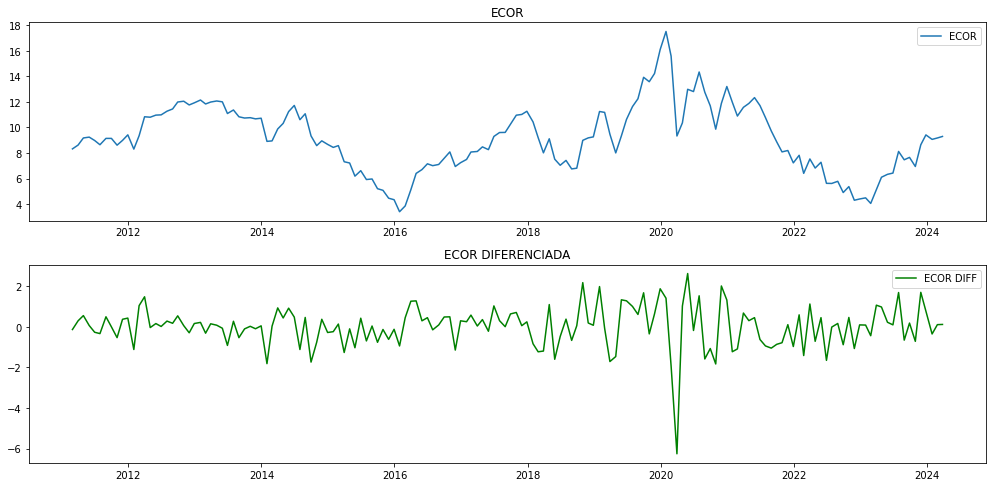

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(ECOR_df['Data'] , ECOR_df['ECOR'], label='ECOR')
plt.title('ECOR')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ECOR_df['Data'] ,ECOR_df['ECOR_diff'], label='ECOR DIFF', color='green')
plt.title('ECOR DIFERENCIADA')
plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(ECOR_df['Data'] ,ECOR_df['LN_DIFF_ECOR'], label='ECOR LN DIFF', color='purple')
# plt.title('ECOR LN DIFERENCIADA')
# plt.legend()

plt.tight_layout()
plt.show()

In [10]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
# Apply the ADF test on each series
print("ECOR:")
adf_test(ECOR_df['ECOR'])

print("\nECOR DIFF:")
adf_test(ECOR_df['ECOR_diff'])

# print("\nECOR LN:")
# adf_test(ECOR_df['LN_ECOR'])

print("\nECOR LN DIFF:")
adf_test(ECOR_df['LN_DIFF_ECOR'])

ECOR:
Results of Dickey-Fuller Test:
Test Statistic                  -2.275478
p-value                          0.179999
#Lags Used                       2.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64

ECOR DIFF:
Results of Dickey-Fuller Test:
Test Statistic                -1.008557e+01
p-value                        1.157848e-17
#Lags Used                     1.000000e+00
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64

ECOR LN DIFF:
Results of Dickey-Fuller Test:
Test Statistic                -1.232238e+01
p-value                        6.705802e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)   

In [90]:
#estatisticas descritivas
print(ECOR_df.info())
print(ECOR_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 2 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       157 non-null    datetime64[ns]
 1   VAR_ECOR   157 non-null    float64       
 2   ECOR_diff  157 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.9 KB
None
         VAR_ECOR   ECOR_diff
count  157.000000  157.000000
mean     0.006787    0.000181
std      0.110067    0.153328
min     -0.401141   -0.343467
25%     -0.073984   -0.088678
50%      0.012128   -0.003268
75%      0.062557    0.094240
max      0.327434    0.511194


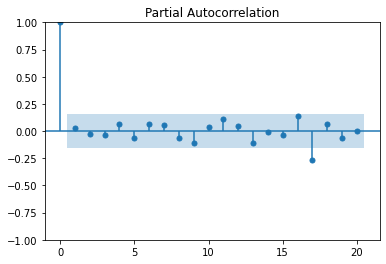

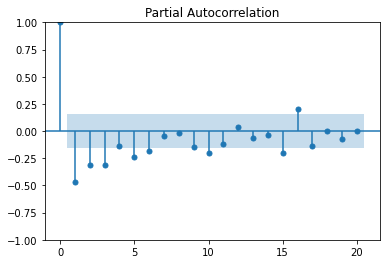

In [91]:
ploct =plot_pacf(ECOR_df['VAR_ECOR'], lags=20, alpha=0.05)
ploct2 =plot_pacf(ECOR_df['ECOR_diff'], lags=20, alpha=0.05)


In [99]:
indicadores = pd.read_excel('indicadores.xlsx', sheet_name= "variacao")
indicadores['Data'] = pd.to_datetime(indicadores['Data'])
indicadores
# indicadores['CAMBIO_diff'] = indicadores['CAMBIO'].diff()
# indicadores['IBC-BR_diff'] = indicadores['IBC-BR'].diff()

#criando um dataframe com as variáveis que serão utilizadas
new_df = indicadores.loc[:, ['Data','VAR_IPCA', 'VAR_CAMBIO', 'VAR_IBCBR', 'VAR_SELIC', 'VAR_IGP-M','DUMMY']]
new_df = new_df.dropna()
new_df

#juntando um new_df com o  CCR_df
df = pd.merge(ECOR_df, new_df, on='Data')
df

,Data,VAR_ECOR,ECOR_diff,VAR_IPCA,VAR_CAMBIO,VAR_IBCBR,VAR_SELIC,VAR_IGP-M,DUMMY
0,2011-03-31,0.035938,0.051322,-0.012500,-0.005988,0.064253,0.090721,-0.380000,0.0
1,2011-04-29,0.064360,0.028423,-0.025316,-0.042169,-0.034775,-0.087243,-0.274194,0.0
2,2011-05-31,0.007220,-0.057140,-0.389610,0.012579,0.023876,0.175951,-0.044444,0.0
3,2011-06-30,-0.028674,-0.035894,-0.680851,-0.012422,-0.010333,-0.032098,-1.418605,0.0
4,2011-07-29,-0.036900,-0.008227,0.066667,-0.018868,0.024268,0.012138,-0.333333,0.0
...,...,...,...,...,...,...,...,...,...
151,2023-11-30,0.244945,0.337968,0.166667,-0.031621,-0.005104,-0.081779,0.180000,0.0
152,2023-12-28,0.089017,-0.155928,1.000000,0.000000,-0.001594,-0.023431,0.254237,0.0
153,2024-01-31,-0.037155,-0.126172,-0.250000,0.002041,-0.024927,0.080676,-0.905405,0.0
154,2024-02-29,0.012128,0.049283,0.976190,0.010183,0.028270,-0.172223,-8.428571,0.0


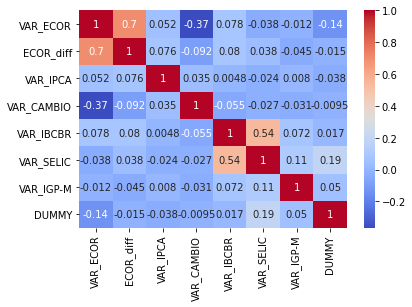

In [100]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

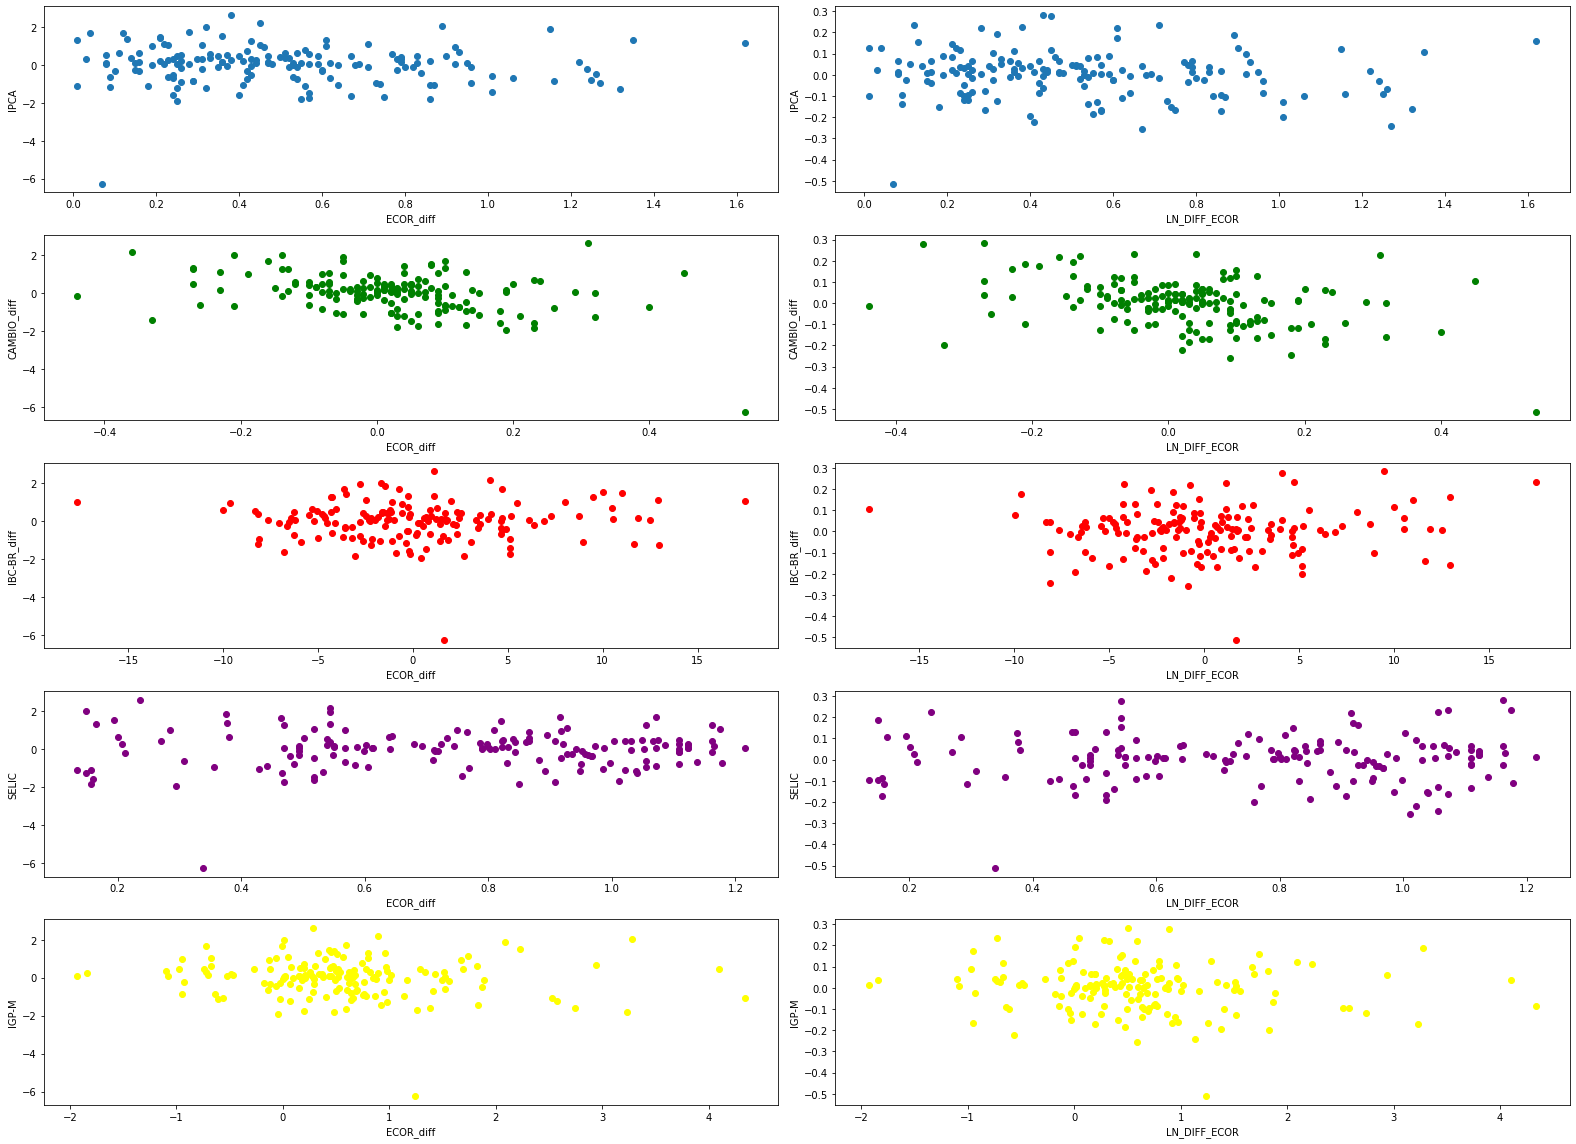

In [57]:
# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(22, 16))

# Scatter plot 1
axes[0, 0].scatter( df['IPCA'], df['ECOR_diff'])
axes[0, 0].set_xlabel('ECOR_diff')
axes[0, 0].set_ylabel('IPCA')

# Scatter plot 1
axes[0, 1].scatter( df['IPCA'], df['LN_DIFF_ECOR'])
axes[0, 1].set_xlabel('LN_DIFF_ECOR')
axes[0, 1].set_ylabel('IPCA')

# Scatter plot 2
axes[1, 0].scatter( df['CAMBIO_diff'], df['ECOR_diff'], color='green')
axes[1, 0].set_xlabel('ECOR_diff')
axes[1, 0].set_ylabel('CAMBIO_diff')

# Scatter plot 2
axes[1, 1].scatter( df['CAMBIO_diff'], df['LN_DIFF_ECOR'], color='green')
axes[1, 1].set_xlabel('LN_DIFF_ECOR')
axes[1, 1].set_ylabel('CAMBIO_diff')

# Scatter plot 3
axes[2, 0].scatter(df['IBC-BR_diff'] , df['ECOR_diff'], color='red')
axes[2, 0].set_xlabel('ECOR_diff')
axes[2, 0].set_ylabel('IBC-BR_diff')

axes[2, 1].scatter(df['IBC-BR_diff'] , df['LN_DIFF_ECOR'], color='red')
axes[2, 1].set_xlabel('LN_DIFF_ECOR')
axes[2, 1].set_ylabel('IBC-BR_diff')


# Scatter plot 4
axes[3, 0].scatter( df['SELIC'], df['ECOR_diff'], color='purple')
axes[3, 0].set_xlabel('ECOR_diff')
axes[3, 0].set_ylabel('SELIC')

axes[3, 1].scatter( df['SELIC'], df['LN_DIFF_ECOR'], color='purple')
axes[3, 1].set_xlabel('LN_DIFF_ECOR')
axes[3, 1].set_ylabel('SELIC')

axes[4, 0].scatter( df['IGP-M'], df['ECOR_diff'], color='yellow')
axes[4, 0].set_xlabel('ECOR_diff')
axes[4, 0].set_ylabel('IGP-M')

axes[4, 1].scatter( df['IGP-M'], df['LN_DIFF_ECOR'], color='yellow')
axes[4, 1].set_xlabel('LN_DIFF_ECOR')
axes[4, 1].set_ylabel('IGP-M')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [80]:
import statsmodels.api as sm

# Define the independent variables
X = df[[ 'VAR_IPCA', 'CAMBIO','SELIC', 'DUMMY']]
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['LN_DIFF_ECOR']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_DIFF_ECOR   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8.629
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           2.63e-06
Time:                        15:12:32   Log-Likelihood:                 139.68
No. Observations:                 158   AIC:                            -269.4
Df Residuals:                     153   BIC:                            -254.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0563      0.030      1.895      

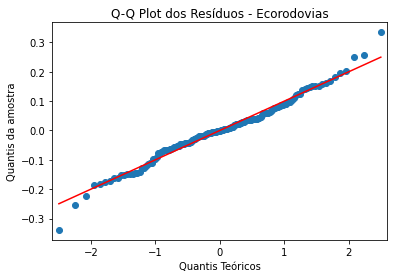

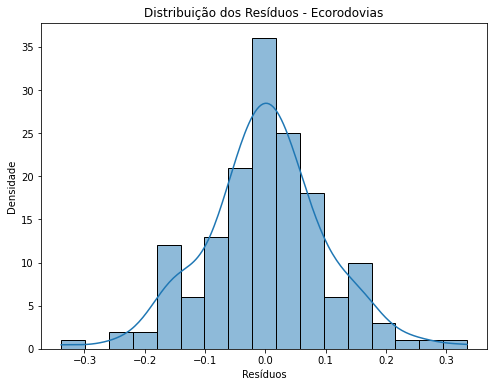

In [81]:
import statsmodels.api as sm# Get the residuals

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos - Ecorodovias')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da amostra')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos - Ecorodovias')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [77]:
# Calculate VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       feature        VIF
0        const  13.539554
1         IPCA   1.154548
2  CAMBIO_diff   1.016905
3        SELIC   1.456214
4        DUMMY   1.595447


Tratamento de outlier

In [59]:
import pandas as pd
#drop the first column of df
df = df.drop(columns=['Data'])
def remove_outliers(df, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers de um DataFrame utilizando quantis.

    :param df: DataFrame de entrada.
    :param lower_quantile: Limite inferior dos quantis (default: 0.05).
    :param upper_quantile: Limite superior dos quantis (default: 0.95).
    :return: DataFrame sem outliers.
    """
    # Calcula os quantis inferior e superior para cada coluna
    quantiles = df.quantile([lower_quantile, upper_quantile])
    
    # Inicializa uma máscara booleana para todos os valores serem verdadeiros
    mask = pd.Series([True] * len(df))
    
    for col in df.columns:
        # Gera uma máscara para cada coluna, considerando os quantis
        col_mask = (df[col] >= quantiles.loc[lower_quantile, col]) & (df[col] <= quantiles.loc[upper_quantile, col])
        # Combina as máscaras
        mask &= col_mask
    
    # Retorna o DataFrame sem os outliers
    return df[mask]

# Exemplo de uso
# df = pd.read_csv('seu_arquivo.csv')  # Carregar seu DataFrame aqui
# df_sem_outliers = remove_outliers(df)

df_sem_outliers = remove_outliers(df)
df_sem_outliers

,ECOR,LN_ECOR,LN_DIFF_ECOR,ECOR_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,8.326451,2.119437,-0.015504,-0.130101,0.80,0.00,3.52,0.843905,1.00,0
1,8.625683,2.154744,0.035307,0.299232,0.79,-0.01,8.75,0.920465,0.62,0
2,9.180836,2.217118,0.062374,0.555153,0.77,-0.07,-5.04,0.840161,0.45,0
3,9.247124,2.224313,0.007194,0.066288,0.47,0.02,3.34,0.987988,0.43,0
4,8.981973,2.195220,-0.029093,-0.265151,0.15,-0.02,-1.48,0.956276,-0.18,0
...,...,...,...,...,...,...,...,...,...,...
151,7.660723,2.036106,0.024854,0.188054,0.26,0.04,-6.44,0.972910,0.37,0
152,6.948098,1.938468,-0.097638,-0.712625,0.24,0.12,0.17,0.997572,0.50,0
154,9.420000,2.242835,0.085276,0.770000,0.56,0.00,-0.23,0.894529,0.74,0
155,9.070000,2.204972,-0.037863,-0.350000,0.42,0.01,-3.59,0.966696,0.07,0


In [72]:
import statsmodels.api as sm

# Define the independent variables
X = df_sem_outliers[[ 'CAMBIO_diff','IPCA','DUMMY','IGP-M','IBC-BR_diff']]
#X = df_sem_outliers[[ 'CAMBIO_diff',  'DUMMY', 'IBC-BR_diff']]
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df_sem_outliers['LN_DIFF_ECOR']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_DIFF_ECOR   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.671
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.152
Time:                        13:37:11   Log-Likelihood:                 107.36
No. Observations:                  81   AIC:                            -202.7
Df Residuals:                      75   BIC:                            -188.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0286      0.018      1.584      

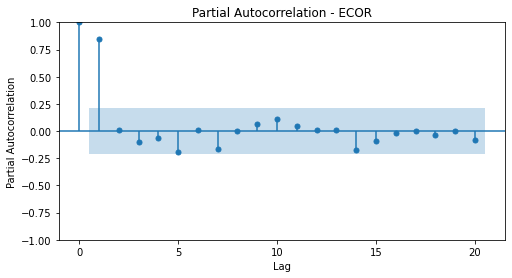

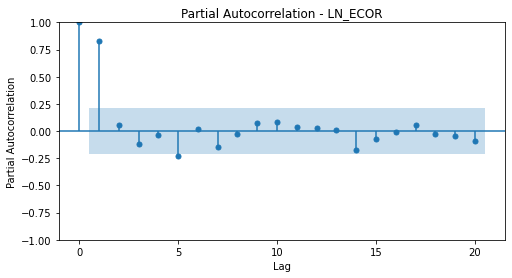

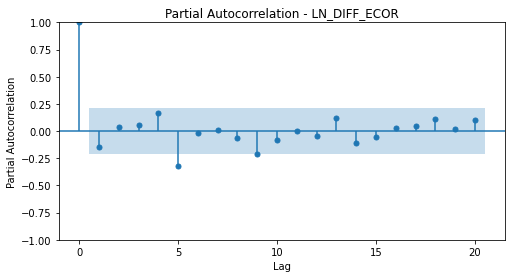

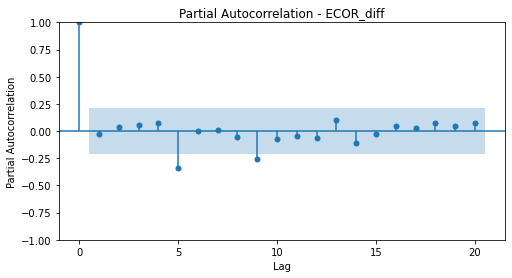

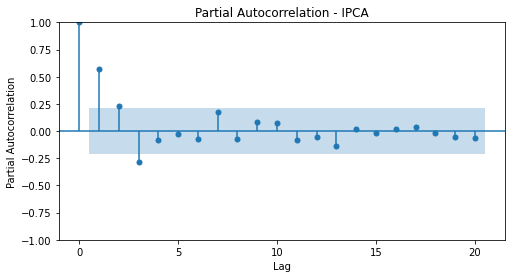

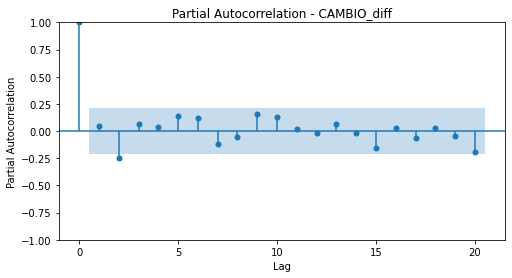

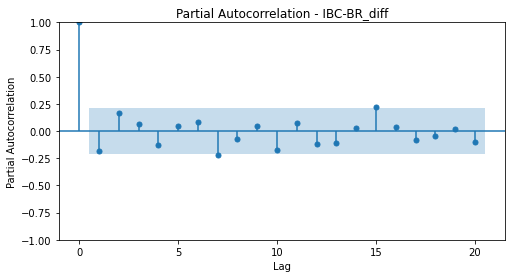

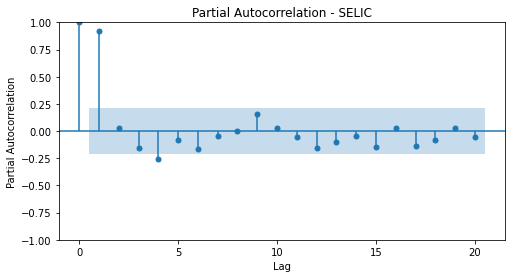

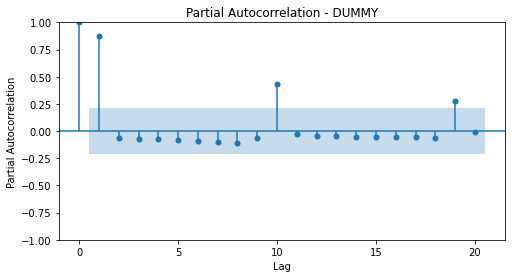

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

# Iterate over each column in df_sem_outliers
for column in df_sem_outliers.columns:
    # Plot PACF for the current column
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_pacf(df_sem_outliers[column], ax=ax, lags=20)
    ax.set_title(f'Partial Autocorrelation - {column}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()

In [65]:
TAE1LAG = df_sem_outliers['ECOR_diff'].shift(0)
IPCA2LAG = df_sem_outliers['IPCA'].shift(4)
CAMBIO1LAG = df_sem_outliers['CAMBIO_diff'].shift(3)
IBCBR2LAG = df_sem_outliers['IBC-BR_diff'].shift(1)
CDI2LAG = df_sem_outliers['SELIC'].shift(2)
IGPM2LAG = df_sem_outliers['IGP-M'].shift(2)

data = pd.DataFrame({'TAE1LAG': TAE1LAG,
                    'CDI2LAG': CDI2LAG,
                    'IBCBR2LAG':IBCBR2LAG,
                    'IPCA2LAG': IPCA2LAG,
                    'CAMBIO1LAG' : CAMBIO1LAG,
                    'IGPM2LAG': IGPM2LAG,
                    'DUMMY': df['DUMMY']
                    })
data = data.dropna()

In [67]:
y = data['TAE1LAG']
X = data[['CAMBIO1LAG','DUMMY','IGPM2LAG','CDI2LAG', 'IBCBR2LAG' , 'IPCA2LAG' ]] 
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                TAE1LAG   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.312
Date:                Mon, 10 Jun 2024   Prob (F-statistic):              0.264
Time:                        14:43:51   Log-Likelihood:                -67.177
No. Observations:                  77   AIC:                             148.4
Df Residuals:                      70   BIC:                             164.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2717      0.317     -0.858      0.3

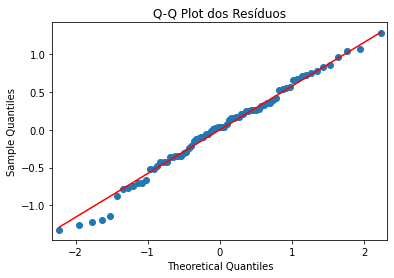

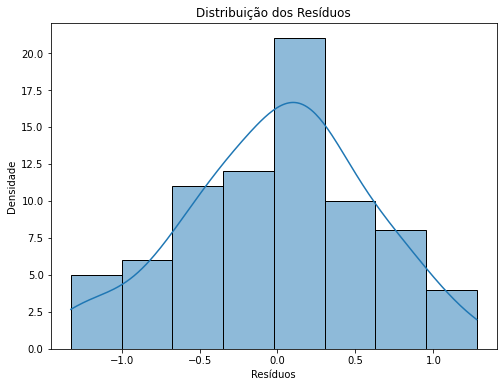

In [68]:
import statsmodels.api as sm# Get the residuals

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()